 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [24, 12]
    plt.rcParams['font.size'] = 40
       
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


C:\Users\Miguel\anaconda3\envs\dsemproducao_venv\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# <font color='blue'> Predição de Vendas - Lojas Rossmann

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão e Demonstração
5. Próximos Passos

# <font color='blue'> 1. Contexto

- Reunião Mensal de Resultados
- CFO solicitou a previsão de vendas das próximas 6 semanas para cada loja

# <font color='blue'> 2. Desafio

### Problema
- Definição de budget para a reforma das lojas

### Causas
- Predição atual de vendas apresetava muita divergência
- O processo de previsão de vendas é baseado apenas em experiências passadas
- Toda a previsão de vendas é realizada manualmente para as mais de 1000 lojas
- A visualização da previsão é limitada ao compudator local.

### Solução
- Usar Machine Learning para realizar a previsão de vendas de todas as lojas
- Disponibilzar as previsões de venda no smartphone


# <font color='blue'> 3. Desenvolvimento da Solução

# DESCRIÇÃO DOS DADOS 

In [6]:
print(f'Number of Rows: {df01.shape[0]}')
print(f'Number of Columns: {df01.shape[1]}')

Number of Rows: 1017209
Number of Columns: 18


# Estatística Descritiva

In [15]:
m1 = pd.DataFrame()
# Central tendency - mean, median
m1['mean'] = num_attributes.apply(np.mean)
m1['median'] =  num_attributes.apply(np.median)
# Dispersion - str, min, max, range, skew, kurtosis
m1['std'] = num_attributes.apply(np.std)
m1['min'] = num_attributes.apply(min)
m1['max'] = num_attributes.apply(max)
m1['range'] = num_attributes.apply(lambda x: x.max() - x.min())
m1['skew'] = num_attributes.apply(lambda x: x.skew())
m1['kurtosis'] = num_attributes.apply(lambda x: x.kurtosis())

# just realocating columns
metrics = m1[['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']]
metrics

,min,max,range,mean,median,std,skew,kurtosis
store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,227580.0,227560.0,6007.076294,2330.0,13682.728423,11.512969,177.136255
competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# 2.0. PASSO 02 - FEATURE ENGINEERING

# Mapa Mental de Hipoteses

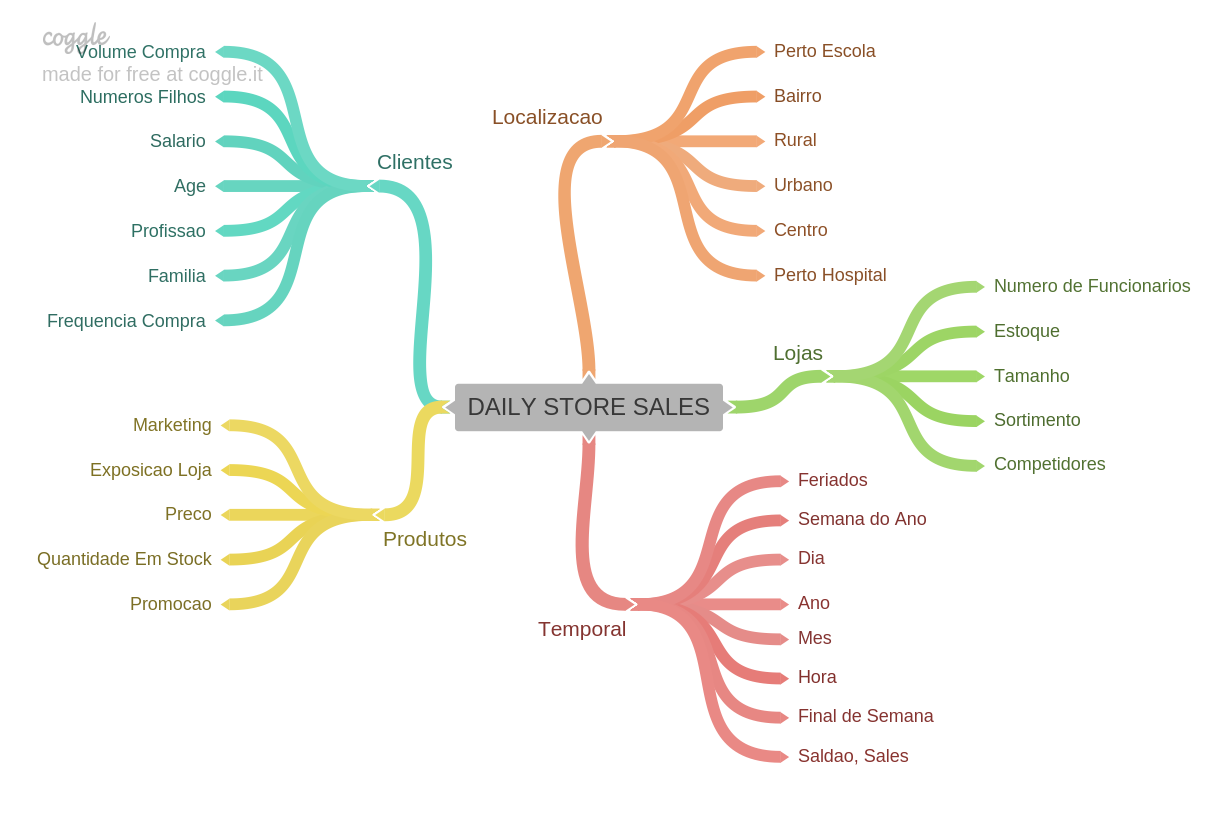

In [20]:
Image('../img/MindMapHypothesis.png')

# Hipoteses da Análise Exploratoria

<b>1. Lojas com maior sortimento deveriam vender mais

<b>2. Lojas com competidores mais proximos deveriam vender menos
    
<b>3. Lojas que têm competidores mais tempo deveriam vender mais (estabilização)

<b>4. Lojas com promoções ativas por mais tempo deveriam vender mais
    
<b>5. Lojas com mais dias de promoção deveriam vender mais
    
<b>6. Lojas com mais promoções consecutivas deveriam vender mais

<b>7. Lojas abertas durante o feriado de Natal deveriam vender mais
    
<b>8. Lojas deveriam vender mais ao longo dos anos

<b>9. Lojas deveriam vender mais no segundo semestre do ano
    
<b>10. Lojas deveriam vender mais depois do dia 10 de cada mês
    
<b>11. Lojas deveriam vender menos aos finais de semana
    
<b>12. Lojas deveriam vender menos durante os feriados escolares

# ANALISE EXPLORATORIA DOS DADOS

# Variável Resposta

C:\Users\Miguel\anaconda3\envs\dsemproducao_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


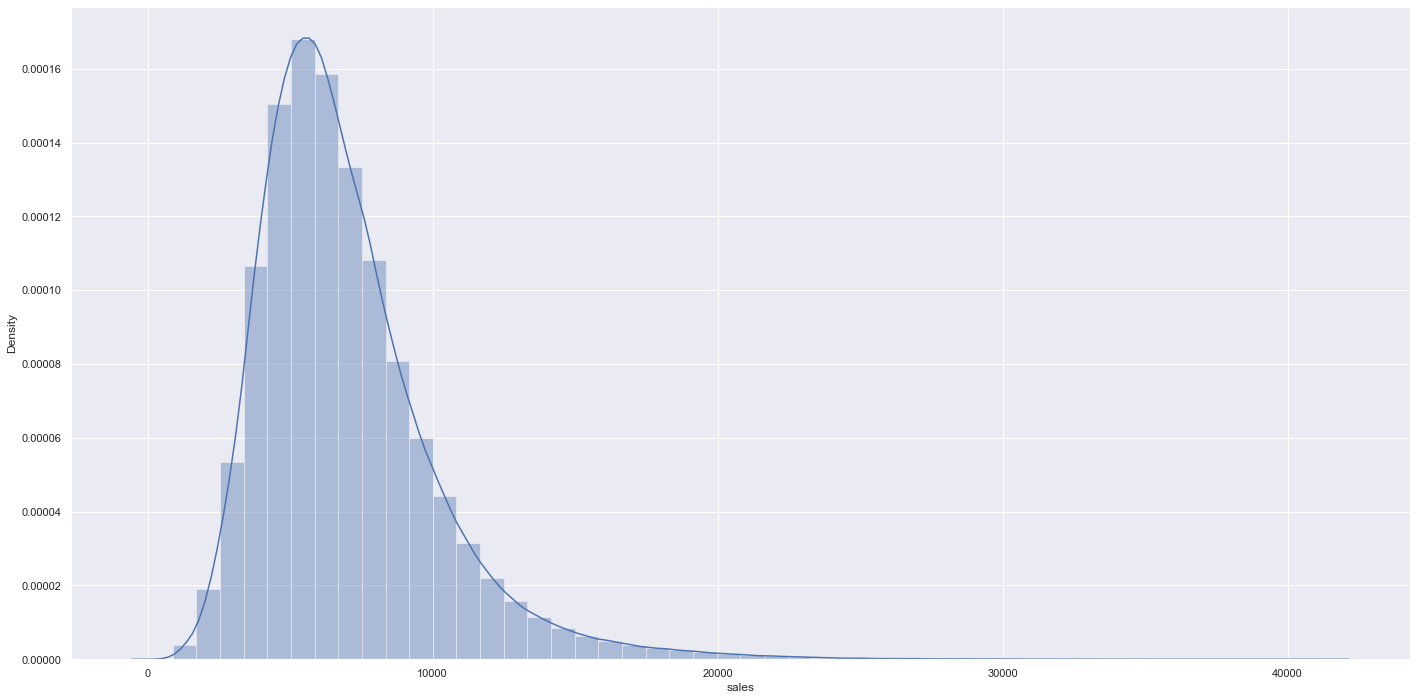

In [29]:
sns.distplot(df03['sales'])
plt.show()

# Variáveis Númericas

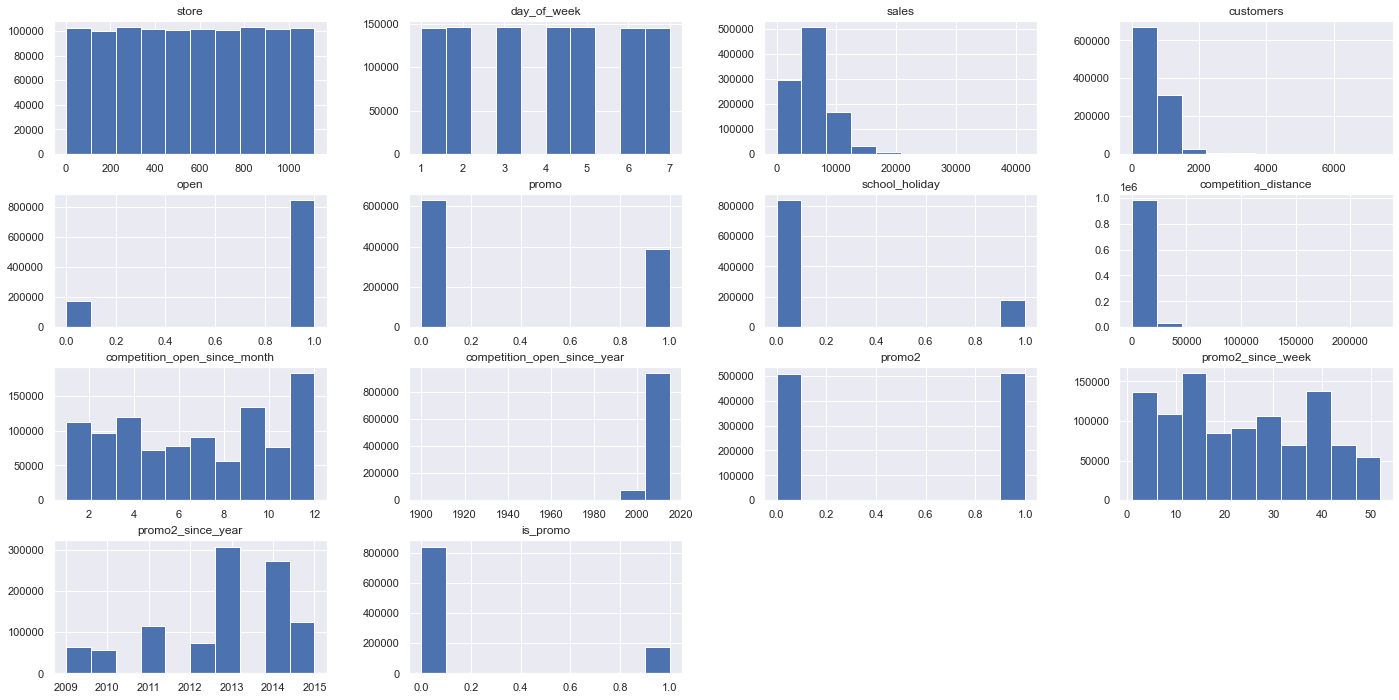

In [30]:
num_attributes.hist();

# Variáveis Categoricas

C:\Users\Miguel\anaconda3\envs\dsemproducao_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Miguel\anaconda3\envs\dsemproducao_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Miguel\anaconda3\envs\dsemproducao_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

<AxesSubplot:xlabel='sales', ylabel='Density'>

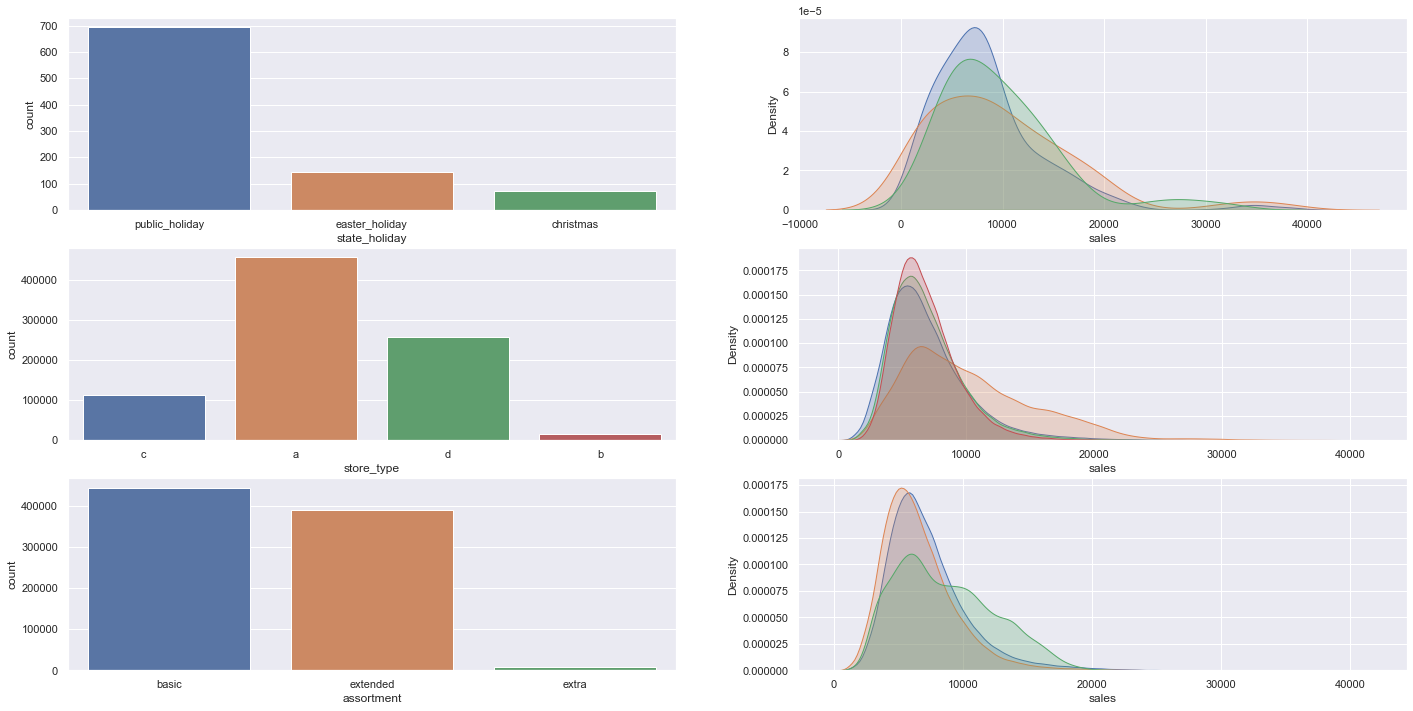

In [32]:
# state_holiday
plt.subplot(3,2,1)
a = df04[df04['state_holiday'] != 'regular_day'] # just because regular day is massive big
sns.countplot(a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df04[df04['state_holiday'] == 'public_holiday']['sales'],label= 'public_holiday',shade=True) # shade=more transparent
sns.kdeplot(df04[df04['state_holiday'] == 'easter_holiday']['sales'],label= 'easter_holiday',shade=True)
sns.kdeplot(df04[df04['state_holiday'] == 'christmas']['sales'],label= 'christmas',shade=True)
#sns.kdeplot(df04[df04['state_holiday'] == 'regular_day']['sales'],label= 'regular_day',shade=True)

# store_type
plt.subplot(3,2,3)
sns.countplot(df04['store_type'])

plt.subplot(3,2,4)
sns.kdeplot(df04[df04['store_type'] == 'a']['sales'],label= 'a',shade=True) # shade=more transparent
sns.kdeplot(df04[df04['store_type'] == 'b']['sales'],label= 'b',shade=True)
sns.kdeplot(df04[df04['store_type'] == 'c']['sales'],label= 'c',shade=True)
sns.kdeplot(df04[df04['store_type'] == 'd']['sales'],label= 'd',shade=True)

# assortment
plt.subplot(3,2,5)
sns.countplot(df04['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df04[df04['assortment'] == 'extended']['sales'],label= 'extended',shade=True) # shade=more transparent
sns.kdeplot(df04[df04['assortment'] == 'basic']['sales'],label= 'basic',shade=True)
sns.kdeplot(df04[df04['assortment'] == 'extra']['sales'],label= 'extra',shade=True)

# Validação de Hipoteses

### H1. Lojas com maior sortimento deveriam vender mais
    
<b><font color='green'>VERDADEIRO</font> - Apesar de basic ter um maior somatorio de vendas (e lojas), o extended possui maior média.

Obs: Tamanho de sortimento --- basic < extra < extended 

Number of stores/Assortment
basic       593
extended    513
extra         9
Name: Assortment, dtype: int64


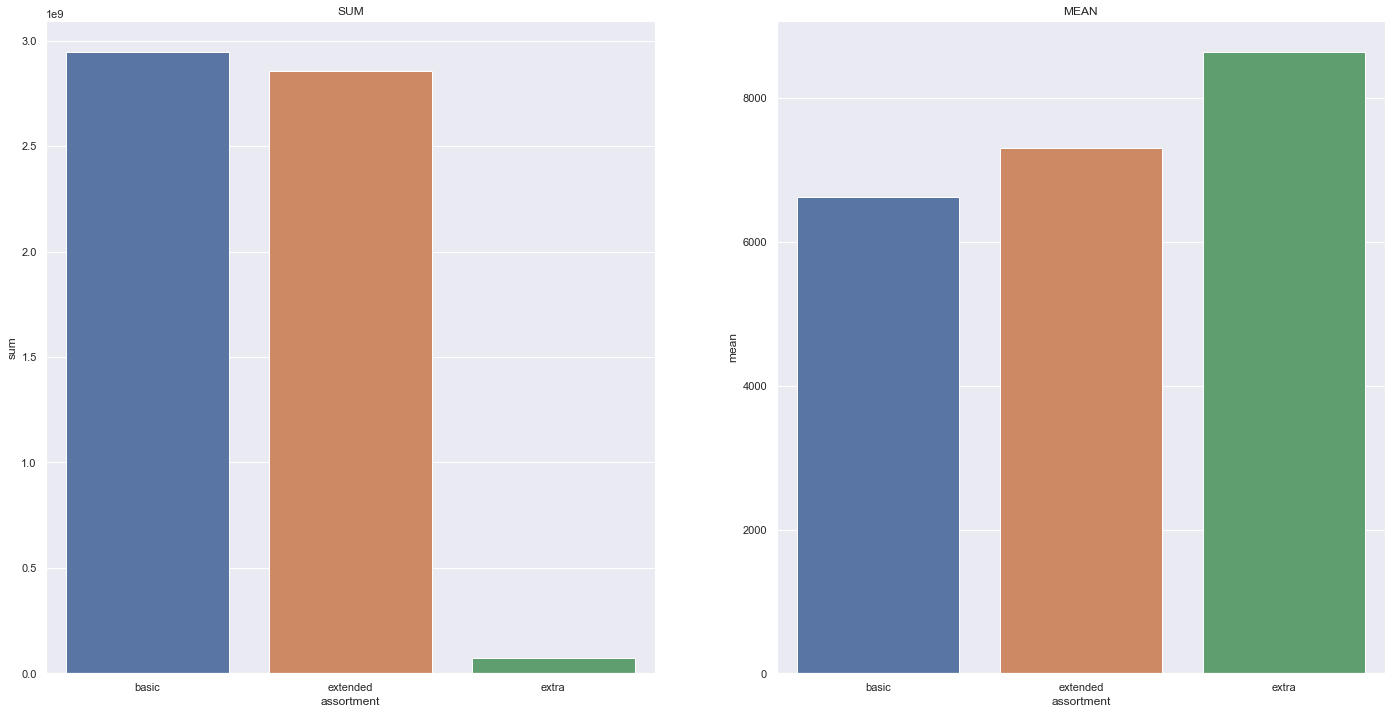

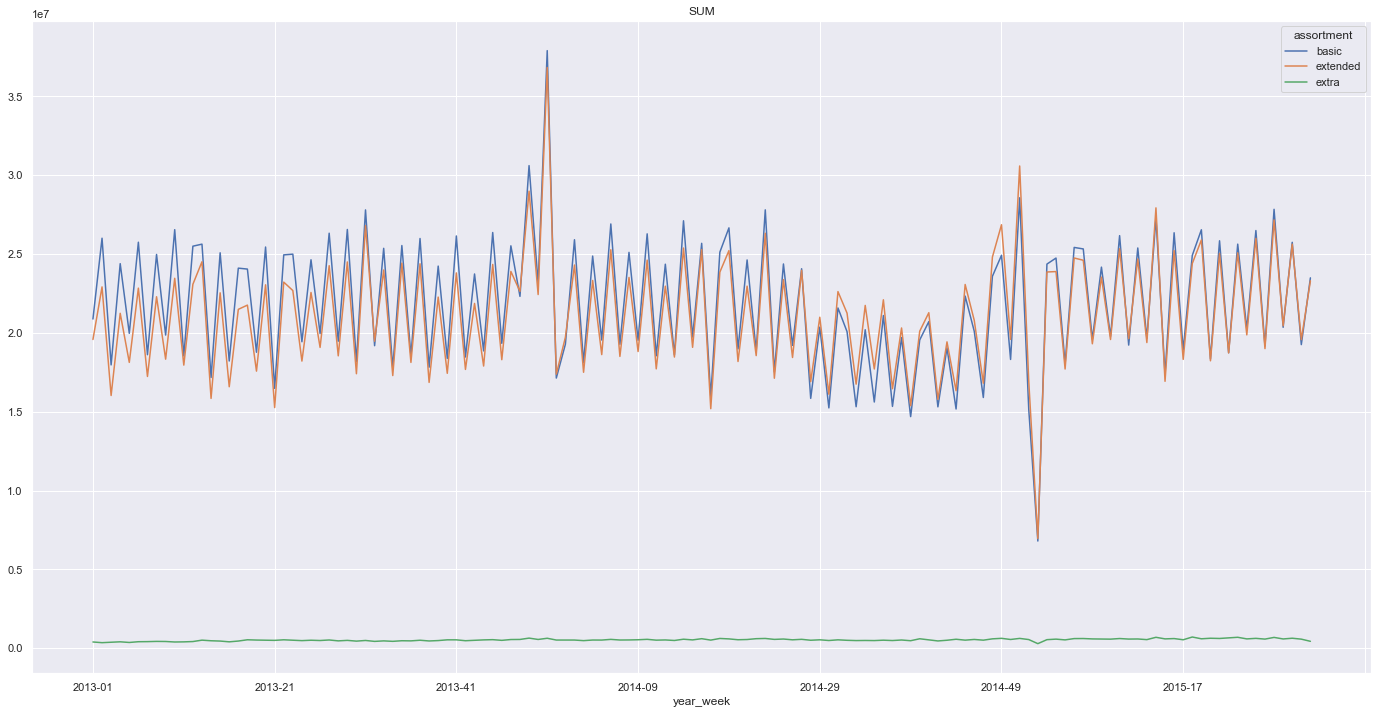

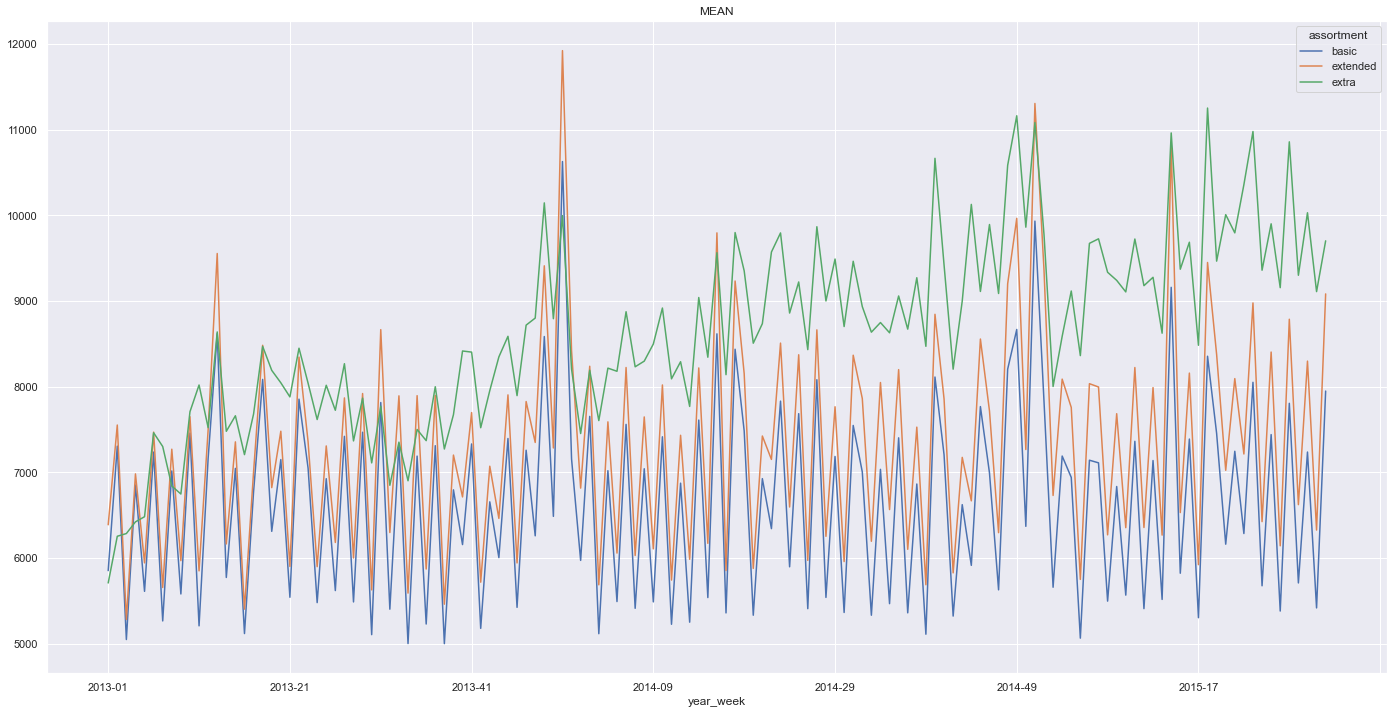

In [33]:
print('Number of stores/Assortment')
print(df_store_raw['Assortment'].value_counts().rename({'a':'basic', 'b': 'extra', 'c': 'extended'}))

h1_group = df04[['assortment', 'sales']].groupby('assortment')
h1_df = pd.DataFrame({
    'count': h1_group.count()['sales'],
    'mean': h1_group.mean()['sales'],
    'sum': h1_group.sum()['sales']
})

plt.subplot(1,2,1)
sns.barplot(x=h1_df.index, y='sum', data=h1_df).set_title('SUM')
plt.subplot(1,2,2)
sns.barplot(x=h1_df.index, y='mean', data=h1_df).set_title('MEAN')

plt.show()

h1_group_week = df04[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment'])
aux1 = h1_group_week.sum().reset_index().pivot(index='year_week', columns='assortment', values='sales')
aux2 = h1_group_week.mean().reset_index().pivot(index='year_week', columns='assortment', values='sales')
aux1.plot(title='SUM')
aux2.plot(title='MEAN')
plt.show()

### H10. Lojas deveriam vender mais depois do dia 10 de cada mês
    
<b><font color='red'>FALSO</font> - Lojas vendem, em média, mais nos primeiros 10 dias de cada mês


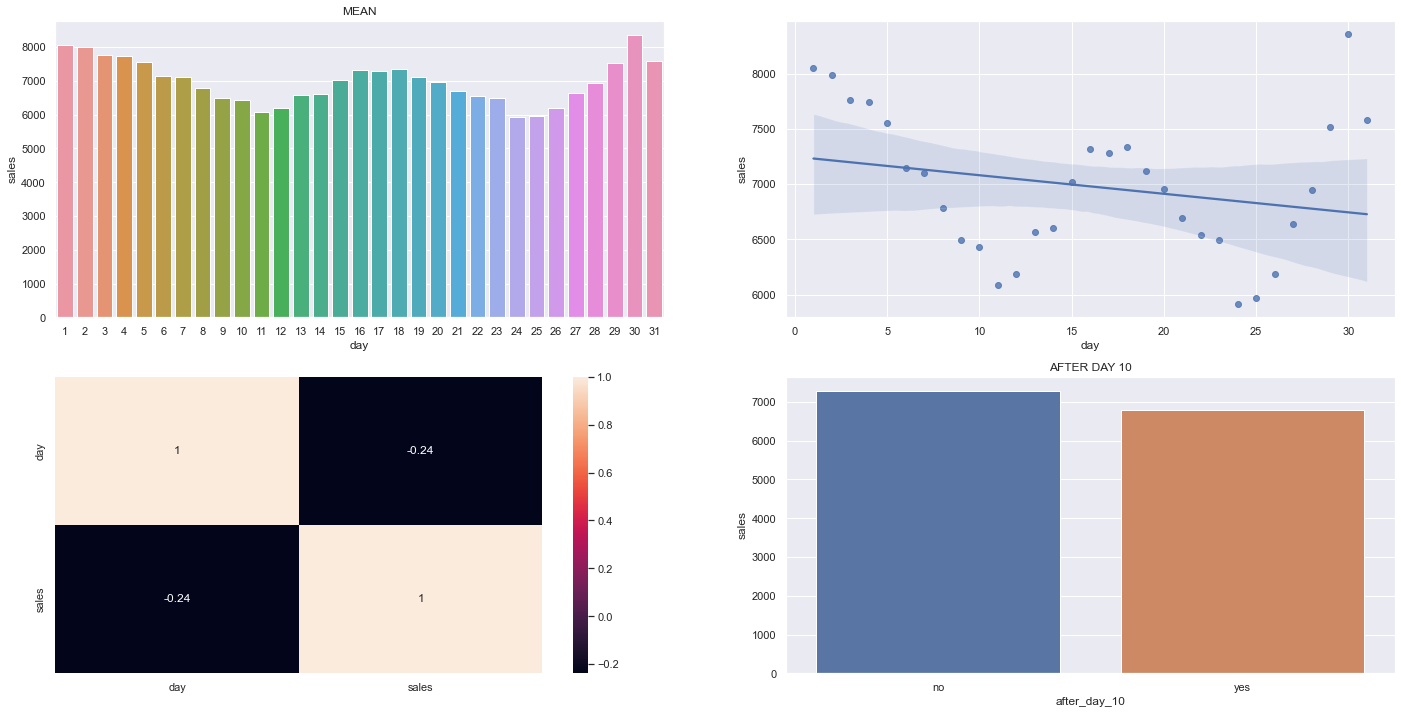

In [41]:
aux1 = df04[['day','sales']].groupby('day').mean().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='day', y='sales', data=aux1).set_title('MEAN')

plt.subplot(2,2,2)
sns.regplot(x='day', y='sales', data=aux1);
            
plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);


plt.subplot(2,2,4)
aux2 = df04.copy()
aux2 = aux2[['day','sales']]

aux2['after_day_10'] = 'no'
aux2.loc[aux2['day']>10, 'after_day_10'] = 'yes'

aux2 = aux2.groupby('after_day_10').mean().reset_index()
sns.barplot(x='after_day_10', y='sales', data=aux2).set_title('AFTER DAY 10');

### H11. Lojas deveriam vender menos aos finais de semana
    
<b><font color='green'>VERDADEIRO</font> - Lojas vendem menos no final de semana, apesar de domingo possuir a maior média entre os dias da semana --> As lojas que abrem ao domingo possuem média alta


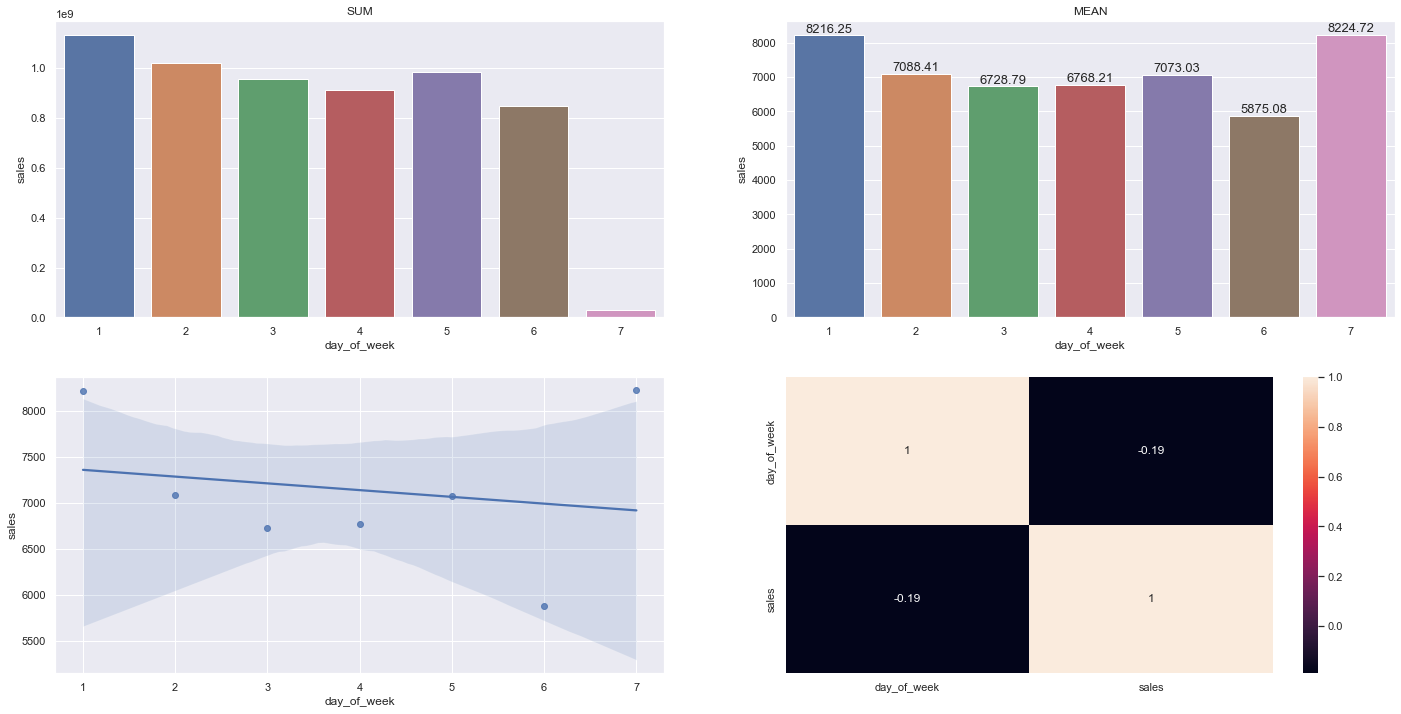

In [42]:
group_h8 = df04[['day_of_week','sales']].groupby('day_of_week')
sum_group = group_h8.sum().reset_index()
mean_group = group_h8.mean().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='day_of_week', y='sales', data=sum_group).set_title('SUM')

plt.subplot(2,2,2)
ax = sns.barplot(x='day_of_week', y='sales', data=mean_group)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=13)
ax.set_title('MEAN')

plt.subplot(2,2,3)
sns.regplot(x='day_of_week', y='sales', data=mean_group);
            
plt.subplot(2,2,4)
sns.heatmap(mean_group.corr(method='pearson'), annot=True);

Apenas lojas que abrem no domingo

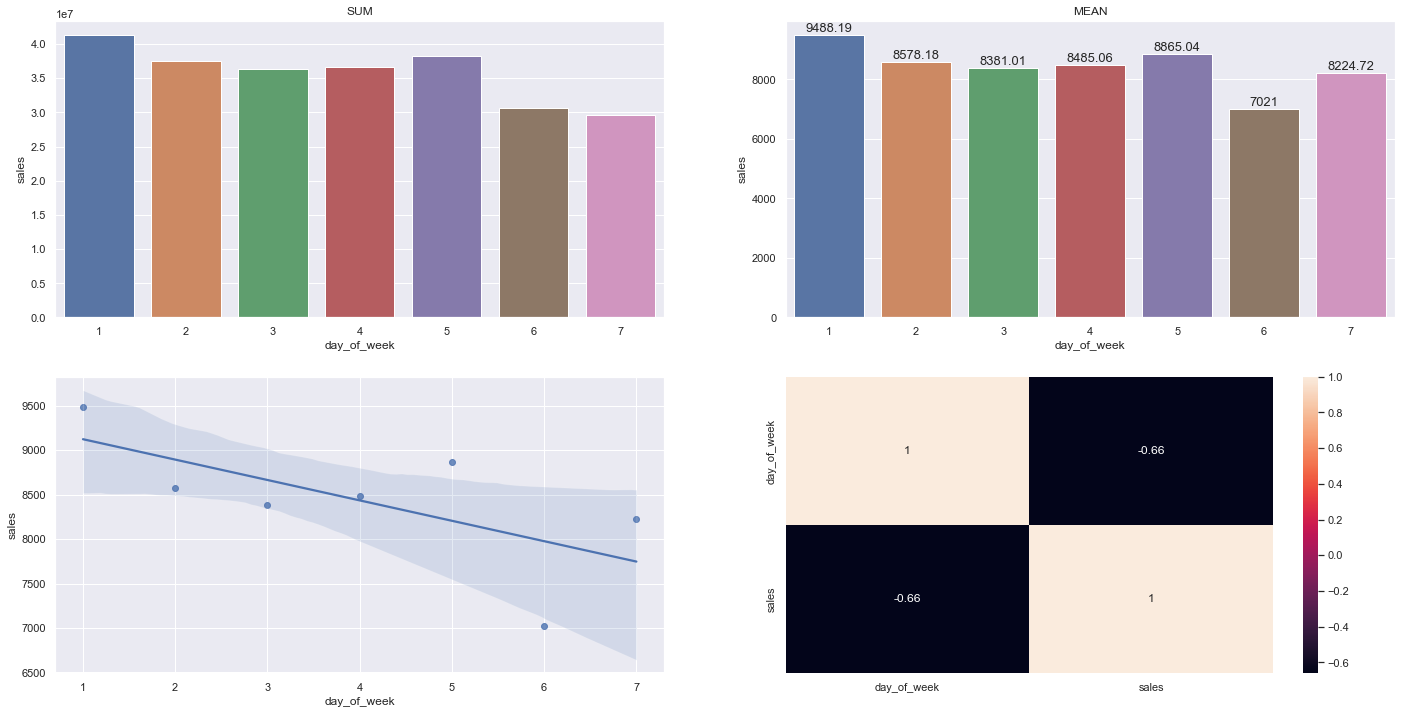

In [47]:
store_open_sunday = list(df04[df04['day_of_week'] == 7]['store'].unique())
open_sunday = df04.loc[df04['store'].isin(store_open_sunday)]

group_h8 = open_sunday[['day_of_week','sales']].groupby('day_of_week')
sum_group = group_h8.sum().reset_index()
mean_group = group_h8.mean().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='day_of_week', y='sales', data=sum_group).set_title('SUM')

plt.subplot(2,2,2)
ax = sns.barplot(x='day_of_week', y='sales', data=mean_group)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=13)
ax.set_title('MEAN')

plt.subplot(2,2,3)
sns.regplot(x='day_of_week', y='sales', data=mean_group);
            
plt.subplot(2,2,4)
sns.heatmap(mean_group.corr(method='pearson'), annot=True);

# Resumo das Hipoteses

In [45]:
r = [['H1', 'Verdadeira', 'Alta'],
 ['H2', 'Falsa', 'Baixa'],
 ['H3', 'Falsa', 'Media'],
 ['H4', 'Verdadeira', 'Media'],
 ['H5', '-', '-'],
 ['H6', 'Falsa', 'Alta'],
 ['H7', 'Verdadeira', 'Baixa'],
 ['H8', 'Falsa', 'Baixa'],
 ['H9', 'Verdadeira', 'Media'],
 ['H10', 'Falsa', 'Media'],
 ['H11', 'Verdadeira', 'Alta'],
 ['H12', 'Falsa', 'Media']]

resume_hip = pd.DataFrame(data=r, columns=['Hipotese', 'Conclusao', 'Relevancia'])
display(resume_hip)

,Hipotese,Conclusao,Relevancia
0,H1,Verdadeira,Alta
1,H2,Falsa,Baixa
2,H3,Falsa,Media
3,H4,Verdadeira,Media
4,H5,-,-
5,H6,Falsa,Alta
6,H7,Verdadeira,Baixa
7,H8,Falsa,Baixa
8,H9,Verdadeira,Media
9,H10,Falsa,Media


# Analise Multivariada

# Numerical Attributes

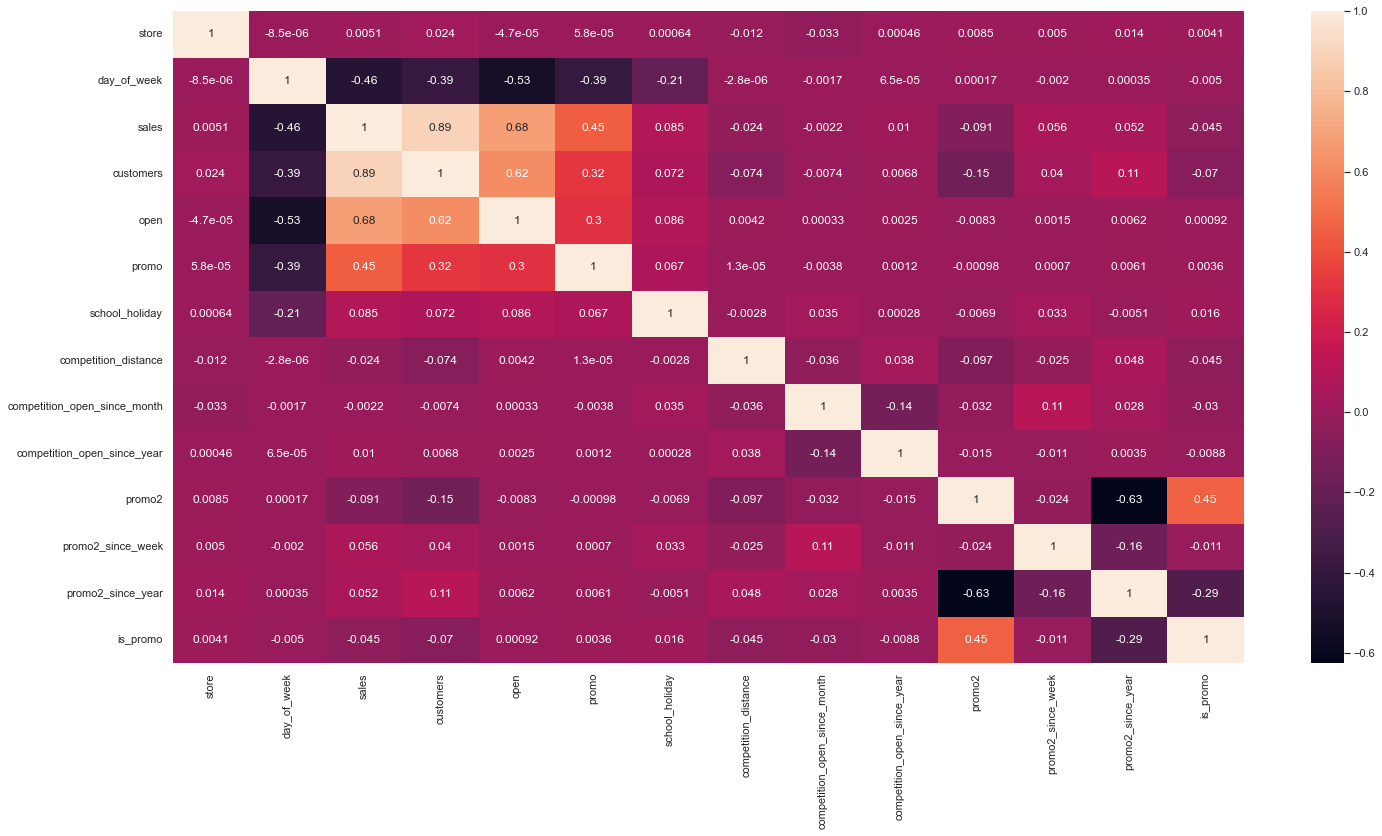

In [46]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

# Categorical Attributes

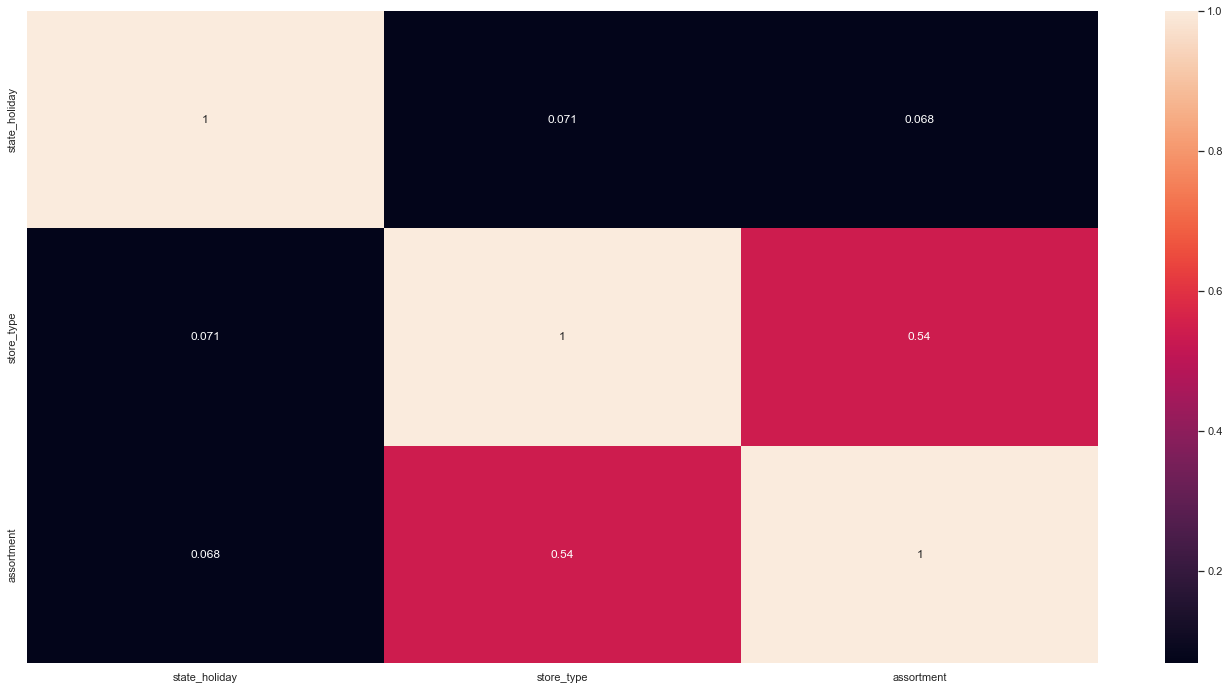

In [47]:
# categorical data
a = df04.select_dtypes(include='object')

# cramer v 
a1 = cramer_v( a['state_holiday'], a['state_holiday'])
a2 = cramer_v( a['state_holiday'], a['store_type'])
a3 = cramer_v( a['state_holiday'], a['assortment'])

a4 = cramer_v( a['store_type'], a['state_holiday'])
a5 = cramer_v( a['store_type'], a['store_type'])
a6 = cramer_v( a['store_type'], a['assortment'])

a7 = cramer_v( a['assortment'], a['state_holiday'])
a8 = cramer_v( a['assortment'], a['store_type'])
a9 = cramer_v( a['assortment'], a['assortment'])

# creating dataframe
d = pd.DataFrame({'state_holiday':[a1, a2, a3],
              'store_type':[a4, a5, a6],
              'assortment':[a7, a8, a9]})
d = d.set_index(d.columns)

# plot
sns.heatmap(d, annot=True);

# MACHINE LEARNING
# Compare Model's Performance

# Single Performance

In [101]:
models_performance = pd.concat([baseline_performance, lr_performance, 
                               lrr_performance, rf_performance, xgb_performance])
models_performance.sort_values('RMSE')

,MODEL_NAME,MAE,MAPE,RMSE
0,Random Forest,685.789625,0.101096,1018.897781
0,XGBoost Regressor,871.412039,0.129831,1260.128054
0,Average Model,1354.800353,0.206400,1835.135542
0,Linear Regression,1867.089787,0.292762,2671.374921
0,Linear Regression - Lasso,1891.205739,0.289296,2743.001978


# Real Performance - Cross Validation

In [102]:
models_result_cv = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
models_result_cv

,MODEL_NAME,MAE,MAPE,RMSE
0,Linea Regression,2081.43 +/- 330.5,0.3 +/- 0.02,2952.61 +/- 523.35
0,Lasso,2115.81 +/- 381.63,0.29 +/- 0.01,3057.22 +/- 563.11
0,Random Forest,864.27 +/- 280.65,0.12 +/- 0.03,1305.33 +/- 434.44
0,XGBoost Regressor,1091.4 +/- 172.52,0.15 +/- 0.02,1575.97 +/- 251.12


# HYPERPARAMETER FINE TUNING

In [104]:
# model
model_xgb_tuned = xgb.XGBRegressor(
         learning_rate=param_tuned['learning_rate'],
         n_estimators=param_tuned['n_estimators'],
         max_depth=param_tuned['max_depth'],
         min_child_weight=param_tuned['min_child_weight'],
         subsample=param_tuned['subsample'],
         colsample_bynode=param_tuned['colsample_bynode'],
         booster="gbtree",
         objective='reg:squarederror').fit(x_train, y_train)

# prediction
yhat_xgb_tuned = model_xgb_tuned.predict(x_test)

# performance
xgb_performance_tuned = ml_error('XGBoost Regressor', np.expm1(y_test),
                           np.expm1(yhat_xgb_tuned))
xgb_performance_tuned

,MODEL_NAME,MAE,MAPE,RMSE
0,XGBoost Regressor,676.81655,0.100198,978.865394


# <font color='blue'> 4. Conclusão e Demonstração

# Business Performance

In [106]:
# sum of predictions
df09_sums = df09[['store', 'predictions', 'sales']].groupby('store').sum().reset_index()

# MAE e MAPE
df09_aux1 = df09[['store', 'sales', 'predictions']].groupby('store').apply(
    lambda x: mean_absolute_error(x['sales'], x['predictions'])).reset_index().rename(columns={0:'MAE'})

df09_aux2 = df09[['store', 'sales', 'predictions']].groupby('store').apply(
    lambda x: mean_absolute_percentage_error(x['sales'], x['predictions'])).reset_index().rename(columns={0:'MAPE'})

# Merge
df09_aux3 = df09_aux1.merge(df09_aux2, on='store')
df09_bp = df09_sums.merge(df09_aux3, on='store')

# Scenarios
df09_bp['worst_scenario'] = df09_bp['predictions'] - (df09_bp['predictions'] * df09_bp['MAPE'])
df09_bp['best_scenario'] = df09_bp['predictions'] + (df09_bp['predictions'] * df09_bp['MAPE'])

df09_bp['worst_scenario'].apply(lambda x: x if x >= 0 else 0)

# order columns
df09_bp = df09_bp[['store', 'sales','predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]

df09_bp.sample(5)

,store,sales,predictions,worst_scenario,best_scenario,MAE,MAPE
810,811,154823.0,148814.328125,137912.842943,159715.813307,302.385063,0.073256
922,923,197417.0,197190.984375,180579.781842,213802.186908,453.853714,0.084239
105,106,332521.0,303013.843750,273576.649237,332451.038263,920.736447,0.097148
259,260,232558.0,229997.468750,208854.933209,251140.004291,583.007311,0.091925
556,557,148642.0,160882.593750,138283.774310,183481.413190,500.425227,0.140468


<AxesSubplot:xlabel='store', ylabel='MAPE'>

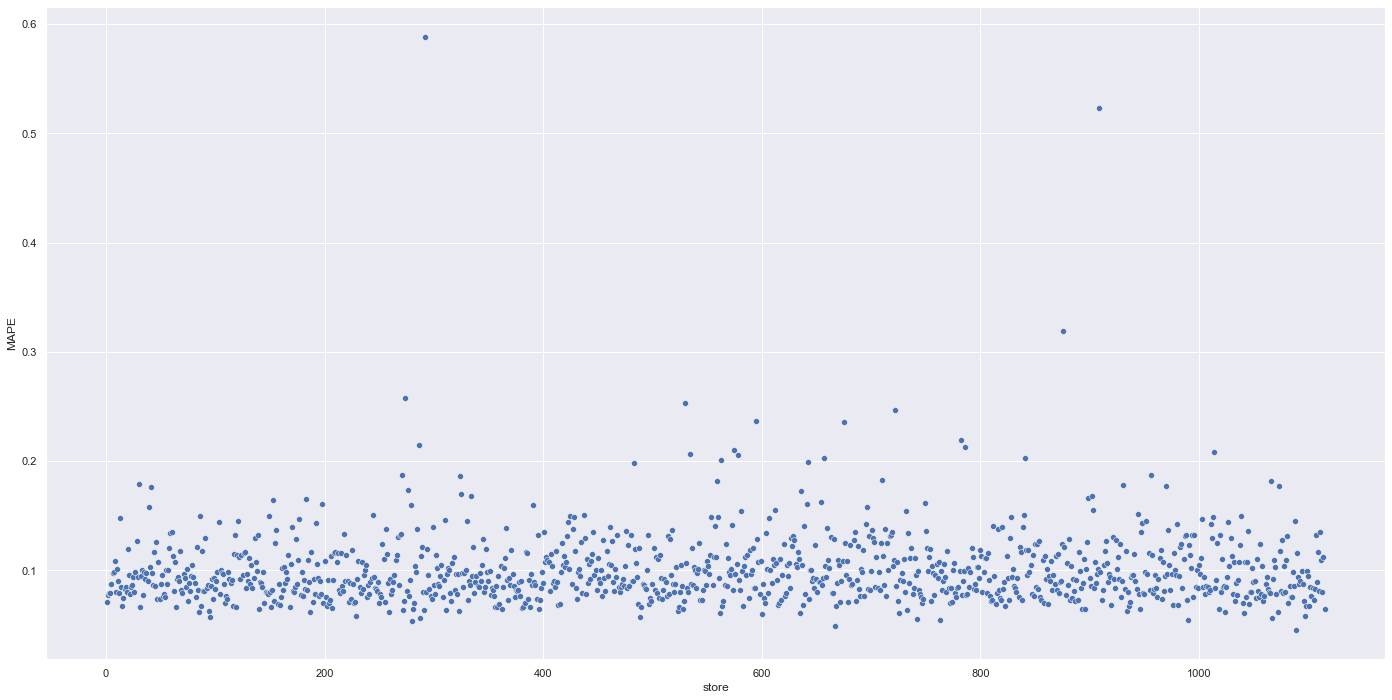

In [107]:
sns.scatterplot(x='store', y='MAPE', data=df09_bp)

# Total Performance

In [108]:
df09_tp = df09_bp[['predictions', 'worst_scenario', 'best_scenario']].apply(
    lambda x: np.sum(x), axis=0).reset_index().rename(columns={'index': 'Scenario', 0:'Values'})

df09_tp['Values'] = df09_tp['Values'].map('R${:,.2f}'.format)
df09_tp

,Scenario,Values
0,predictions,"R$284,728,032.00"
1,worst_scenario,"R$256,668,815.46"
2,best_scenario,"R$312,787,262.65"


# Machine Learning Performance

C:\Users\Miguel\anaconda3\envs\dsemproducao_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Miguel\anaconda3\envs\dsemproducao_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


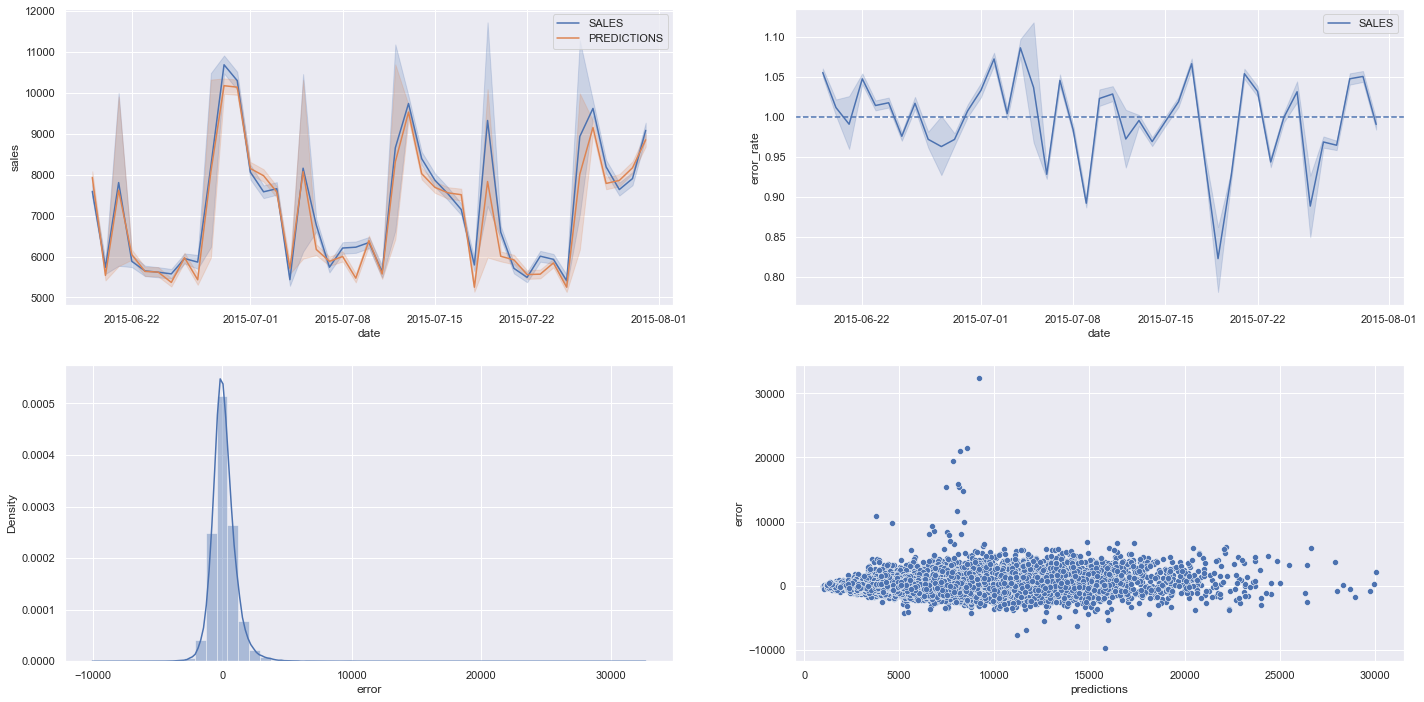

In [110]:
plt.subplot(2,2,1)
sns.lineplot(x='date', y='sales', data=df09,label='SALES')
sns.lineplot(x='date', y='predictions', data=df09, label='PREDICTIONS')

plt.subplot(2,2,2)
sns.lineplot(x='date', y='error_rate', data=df09,label='SALES')
plt.axhline(1, linestyle='--')

plt.subplot(2,2,3)
sns.distplot(df09['error'])

plt.subplot(2,2,4)
sns.scatterplot(df09['predictions'], df09['error']);

# <font color='blue'> 5. Próximos Passos

- Workshop do modelo para os stakeholders
- Coleta feedaback sobre a usabilidade
- Diminuir o erro do modelo em 10%

# <font color='blue'> Perguntas?

# <font color='blue'> Obrigado!